# Fully Connected Neural Networks to classify 2D synthetic data

This project demonstrates the usage of fully connected neural-networks to classify 2-dimensional synthetic data. For the purpose of this project, I implemented the neural network using Keras and TensorFlow. Keras and TensorFlow are powerful frameworks that allows one to build many  deep-learning-based applications. This is my first machine-learning based project using python!!!


  
      
## Importing Python Libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
! ls gdrive/MyDrive/JNotebooks/

Basics_of_Numpy.ipynb
Basics_of_python.ipynb
tutorial03-overfitting_regularization.ipynb
tutorial04_fully_connected_neural_network_2D_synthetic_example_colab.ipynb
tutorial04_fully_connected_neural_network_2D_synthetic_example.ipynb
tutorial05_different_approaches_to_define_neural_networks_keras.ipynb
tutorial07_softmax_one_hot_encoding_loss_functions.ipynb
tutorial08_step_by_step_MNIST_digits_classification.ipynb
tutorial09_fully_connected_neural_networks_revisited.ipynb
tutorial10_step_by_step_MNIST_digits_classification_cnn.ipynb
tutorial12_auto_encoder_mnist.ipynb
tutorial14_recurrent_neural_networks.ipynb
tutorial15_generative_adversarial_networks.ipynb


In [3]:
!pip install dataset_utils
!pip install tf-models-official for dataset_utils
%matplotlib inline
import numpy as np # Import numpy library with nickname np
import matplotlib.pyplot as plt # Import matplotlib library with nickname plt
import tensorflow as tf # Import tensorflow with nickname tf

from tensorflow.keras.utils import to_categorical # Imports function to convert labels to one-hot encoding
from tensorflow.keras.models import Model # Imports function to create neural network model
from tensorflow.keras.layers import Dense, Activation,Input # Imports function to build layers of model
from tensorflow.keras.optimizers import SGD # selects stochastic gradient descent function as optimizer for compiling model

import sys
## Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = '/content/gdrive/MyDrive/ENEL645/Modules/dataset_utils.py'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils 

## Loading and Displaying a Synthetic 2D Dataset

In [6]:
#Generating a synthetic dataset with four classes
nsamples = 300

#data = dataset_utils.corners(N = nsamples,scale = 0.5,gapwidth = 3,cornerwidth = 4) # linear dataset
data = dataset_utils.crescent_full_moon(N = nsamples,r1 = 5,r2 = 10,r3 = 15) #non-linear dataset

# Separating features (X) and labels (Y)
Y = data[:,-1].astype(int) # Labels
X = data[:,:-1] # Features

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Dataset")
plt.show()

AttributeError: ignored

## Train, Validation and Test Sets Split

In [ ]:
# First I shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, I split the data into train/val/test sets
train_split = np.int(0.5*Y.size)
val_split = np.int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

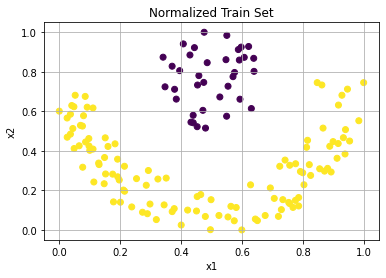

In [ ]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################


#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set")
plt.show()

## Representing Labels using one-hot-ecoding

In [ ]:
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[1 1 1 1 1]

Y_oh_train[:5]=
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## Defining a Fully Connected Neural Network with Keras

In [ ]:
def my_model(k,learning_rate = 0.15):
    inputs = Input(shape=(2,))
    l1 = Dense(10, activation='relu')(inputs)
    out1 = Dense(k, activation='softmax')(l1)
    model = Model(inputs=inputs, outputs=out1)
    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ["accuracy"]) 
    return model

In [ ]:
model = my_model(k)
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


## Training the Model

In [ ]:
batch_size = train_split
nb_epoch = 300
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val), \
                    batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 81ms/step - loss: 0.0751 - accuracy: 0.9867 - val_loss: 0.0670 - val_accuracy: 0.9867
Epoch 2/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0749 - accuracy: 0.9867 - val_loss: 0.0668 - val_accuracy: 0.9867
Epoch 3/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0748 - accuracy: 0.9867 - val_loss: 0.0668 - val_accuracy: 0.9867
Epoch 4/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0747 - accuracy: 0.9867 - val_loss: 0.0666 - val_accuracy: 0.9867
Epoch 5/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0746 - accuracy: 0.9867 - val_loss: 0.0667 - val_accuracy: 0.9867
Epoch 6/300
1/1 [==============================] - 0s 38ms/step - loss: 0.0745 - accuracy: 0.9867 - val_loss: 0.0665 - val_accuracy: 0.9867
Epoch 7/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0744 - accuracy: 0.9867 - val_loss: 0.0663 - val_accuracy: 1.0000
Epoch 8/300
1/1 [===

## Prininting Loss and estimated weights (Ws)

Final loss (cross-entropy and accuracy): [0.06040728837251663, 1.0]

Layer 0
Bias:
 [-0.24971172 -0.2966556   0.         -0.54409826 -1.0195138  -0.61981076
 -0.4892249  -0.04016162  1.163642   -0.10207707]
W:
 [[ 0.46278504  0.54565805 -0.67271644  1.2281783   3.9597368   1.17739
   1.2568238   0.67781234 -0.03229052 -0.42773208]
 [-0.6121395   0.711592   -0.22266501  1.1561031  -1.50947     1.4235811
   0.9610449   0.02741428 -0.5418146   0.16935728]]

Layer 1
Bias:
 [-1.3864896  1.3864895]
W:
 [[-0.23743775 -0.5575094 ]
 [-0.12475123 -1.1257856 ]
 [ 0.36475652  0.6729104 ]
 [ 1.3868017  -0.96613926]
 [-2.9415338   3.1961472 ]
 [ 1.2953634  -1.5439974 ]
 [ 1.3537148  -1.067401  ]
 [ 0.6549736   0.132233  ]
 [-0.41099325  1.3211036 ]
 [ 0.5799965  -0.13332626]]



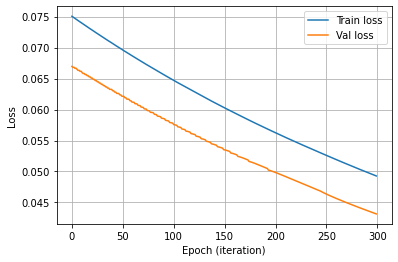

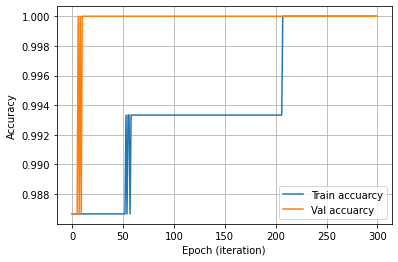

In [ ]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

## Classifier Decision Boundary

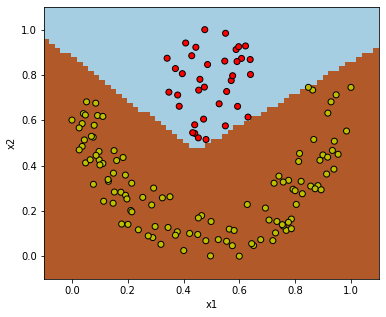

In [ ]:
h = .02  # step size in the mesh
slack = 0.1

x_min, x_max = X_train.min(axis=0) - slack, X_train.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X_train[:,0], X_train[:,1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()